In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


#來源：https://colab.research.google.com/github/willismax/matplotlib_show_chinese_in_colab/blob/master/matplotlib_show_chinese_in_colab.ipynb#scrollTo=RfR0uymWF3cB

--2023-01-09 07:57:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.20.138, 74.125.20.139, 74.125.20.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/93s0knk5h1golmurk2qtmqo8q2esjmbj/1673250975000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4cf1d8d4-1fbe-44fc-9357-9f7216b28a13 [following]
--2023-01-09 07:57:04--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/93s0knk5h1golmurk2qtmqo8q2esjmbj/1673250975000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4cf1d8d4-1fbe-44fc-9357-9f7216b28a13
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to doc-0k-9o-

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data analytics/uniqlo_sales_data/23 L2W1-uniqlo.csv')

In [4]:
#觀察資料
data

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
22288,146,杭州,线下,Female,30-34,Weekday,短裤,1,80.0,1,2,19
22289,430,成都,线下,Female,25-29,Weekend,T恤,1,79.0,1,1,49
22290,449,武汉,线下,Female,35-39,Weekday,T恤,1,158.0,1,2,49
22291,758,杭州,线下,Female,20-24,Weekday,袜子,1,26.0,1,1,9


In [5]:
data['wkd_ind']

0        Weekday
1        Weekday
2        Weekday
3        Weekday
4        Weekend
          ...   
22288    Weekday
22289    Weekend
22290    Weekday
22291    Weekday
22292    Weekday
Name: wkd_ind, Length: 22293, dtype: object

In [6]:
data.loc[0]

store_id            658
city                 深圳
channel              线下
gender_group     Female
age_group         25-29
wkd_ind         Weekday
product            当季新品
customer              4
revenue           796.0
order                 4
quant                 4
unit_cost            59
Name: 0, dtype: object

In [7]:
print(data.columns)
print(data.describe())
print(data.shape)

#12個特徵欄位

Index(['store_id', 'city', 'channel', 'gender_group', 'age_group', 'wkd_ind',
       'product', 'customer', 'revenue', 'order', 'quant', 'unit_cost'],
      dtype='object')
           store_id      customer       revenue         order         quant  \
count  22293.000000  22293.000000  22293.000000  22293.000000  22293.000000   
mean     335.391558      1.629480    159.531371      1.651998      1.858072   
std      230.236167      1.785605    276.254066      1.861480      2.347301   
min       19.000000      1.000000     -0.660000      1.000000      1.000000   
25%      142.000000      1.000000     64.000000      1.000000      1.000000   
50%      315.000000      1.000000     99.000000      1.000000      1.000000   
75%      480.000000      2.000000    175.000000      2.000000      2.000000   
max      831.000000     58.000000  12538.000000     65.000000     84.000000   

          unit_cost  
count  22293.000000  
mean      46.124658  
std       19.124347  
min        9.000000  
25%  

In [8]:
data[data.duplicated()]

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
217,245,杭州,线下,Female,30-34,Weekday,当季新品,1,79.0,1,1,59
518,335,上海,线下,Female,30-34,Weekend,T恤,1,79.0,1,1,49
574,315,武汉,线下,Female,25-29,Weekend,T恤,1,79.0,1,1,49
669,802,西安,线下,Male,>=60,Weekday,T恤,1,59.0,1,1,49
810,325,上海,线下,Female,25-29,Weekday,牛仔裤,1,59.0,1,1,69
...,...,...,...,...,...,...,...,...,...,...,...,...
22277,611,深圳,线下,Male,20-24,Weekday,T恤,1,79.0,1,1,49
22278,70,深圳,线下,Male,>=60,Weekend,短裤,1,40.0,1,1,19
22280,21,北京,线下,Female,35-39,Weekend,T恤,1,59.0,1,1,49
22289,430,成都,线下,Female,25-29,Weekend,T恤,1,79.0,1,1,49


#解析欄位代表意義
* store_id	店鋪ID
* city	店鋪城市
* channel 購買管道(線上/線下)	
* gender_group	性別(男/女)
* age_group	年齡
* wkd_ind	購買時間是在週間還是週末
* product	產品類別
* customer	顧客數量
* revenue	銷售金額
* order	訂單數量
* quant	購買的產品數量
* unit_cost 產品的成本

In [9]:
print(data['city'].unique())
print(data['channel'].unique())
print(data['gender_group'].unique())
print(data['age_group'].unique())
print(data['wkd_ind'].unique())
print(data['product'].unique())


['深圳' '杭州' '武汉' '北京' '重庆' '西安' '广州' '南京' '上海' '成都']
['线下' '线上']
['Female' 'Male' 'Unkown']
['25-29' '>=60' '20-24' '35-39' '30-34' '45-49' '50-54' '40-44' 'Unkown'
 '55-59' '<20']
['Weekday' 'Weekend']
['当季新品' '运动' 'T恤' '袜子' '短裤' '牛仔裤' '毛衣' '配件' '裙子']


#觀察完以上欄位，可能會想知道的問題有哪些?

根據資料維度可以提出11880個問題，

以下隨機假設幾個常見問題


<H3><營運>

1.週間跟週末的銷售情況?  
2.每個城市線上線下的情況?  
3.哪些類別的產品是營收最高的?  
4.哪些類別的產品是毛利最高的?  
5.總體的顧客樣貌是什麼?  
6.銷售額和產品成本之間的關係?   

================================================================================


In [10]:
duplicated_rows = data.duplicated()
print(duplicated_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
22288    False
22289     True
22290     True
22291    False
22292    False
Length: 22293, dtype: bool


In [11]:
#用apply新增一個欄位revenue_per_day 最後groupby加總後可得到 上班日每一天的營收(所有管道店鋪)、周末每一天平均營收(所有管道店鋪)
def add_perday_revenue(data):
  if data['wkd_ind'] == 'Weekday':
    data['revenue_per_day'] = data['revenue'] / 5
  else :
    data['revenue_per_day'] = data['revenue'] / 2
  return data

data = data.apply(add_perday_revenue, axis=1)

In [12]:
#1.週間跟週末的銷售情況 

data_q1 = data.groupby('wkd_ind')['wkd_ind','revenue','quant','revenue_per_day'].sum()
data_q1

<ipython-input-12-a920bd44278a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_q1 = data.groupby('wkd_ind')['wkd_ind','revenue','quant','revenue_per_day'].sum()


,revenue,quant,revenue_per_day
wkd_ind,,,
Weekday,2093947.98,24546,418789.596
Weekend,1462484.87,16876,731242.435


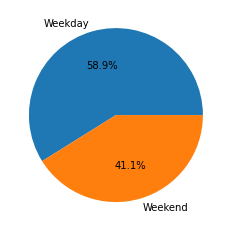

In [13]:
labels = ['Weekday', 'Weekend'] 
sizes = [2093947.98, 1462484.87]
plt.pie(sizes, labels=labels, autopct='%.1f%%')
plt.show()
#weekday(1~5) weekend(6~7)


In [14]:
data_q1.index

Index(['Weekday', 'Weekend'], dtype='object', name='wkd_ind')

wkd_ind
Weekday    418789.596
Weekend    731242.435
Name: revenue_per_day, dtype: float64


Text(0, 0.5, 'revenue_per_day')

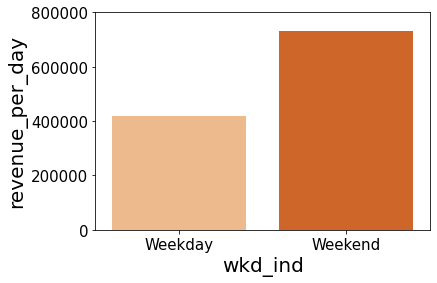

In [15]:
print(data_q1['revenue_per_day'])

#週間銷售件數稍微多一些
sns.barplot(x=['Weekday', 'Weekend'],y='revenue_per_day',data=data_q1,palette="Oranges")
plt.tick_params(labelsize=15)
plt.xlabel('wkd_ind',fontsize=20)
plt.ylim(0, 800000) #調整y大小
plt.ylabel('revenue_per_day',fontsize=20)

wkd_ind
Weekday    24546
Weekend    16876
Name: quant, dtype: int64


Text(0, 0.5, 'quant')

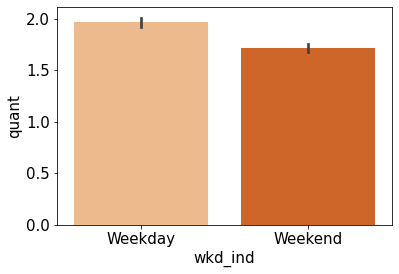

In [16]:
print(data_q1['quant'])

#週間銷售件數稍微多一些
sns.barplot(x='wkd_ind',y='quant',data=data,palette="Oranges")
plt.tick_params(labelsize=15)
plt.xlabel('wkd_ind',fontsize=15)
plt.ylabel('quant',fontsize=15)

<Q1問題及結論> #1.週間跟週末的銷售情況   
=====
工作日總銷售金額為2093947.98人民幣  
非工作日銷售金額為1462484.87人民幣  

工作日的商品銷售數量為24546件
非工作日商品銷售數量為16876件  

單看營收跟銷售數量的話，整體來說工作日表現較佳，但若除上營業天數  
工作日銷售金額(每日)：418,789.596 人民幣  
非工作日銷售金額(每日)：731,242.435 人民幣    

工作日銷售數量(每日)：4,909.2 件  
非工作日銷售數量(每日)：8,438.0 件  

整體來說非工作日營收較佳，符合常理  


=======================================================   
<h2>可延伸問題<h2>  

<drill down 1> 工作日和周末銷售狀況跟類別的關係?  
<drill down 2> 工作日和非工作日的來客狀況為何? 客單價為何?  
<drill down 3> 工作日和非工作日若再分成線上及線下，營運概況?

In [17]:
#2.每個城市線上線下的情況，線上表現最佳的5間，以及線下表現最佳的五間為何?

data_q2 = pd.DataFrame(data.groupby(['city' ,'channel'])['customer','revenue'].sum())
data_q2

<ipython-input-17-005218fdc9de>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_q2 = pd.DataFrame(data.groupby(['city' ,'channel'])['customer','revenue'].sum())


customer    revenue
city channel                     
上海   线上           1219  114438.09
     线下           2754  275383.64
北京   线下           1289  130458.62
南京   线下           1098  123150.93
广州   线上           2089  200893.30
     线下           1266  117231.19
成都   线下           2235  208189.86
杭州   线下           6120  589518.49
武汉   线上           2864  281420.73
     线下           3034  308357.05
深圳   线下           7372  733123.68
西安   线上            324   30088.01
     线下           1930  180686.61
重庆   线上            249   26330.35
     线下           2483  237162.30

In [64]:
data_q2.xs('线上', level='channel').sort_values(by='revenue', ascending=False, inplace=False) #在 Pandas 中篩選某一個多層次索引的單一索引，可以使用 .xs() 方法 xs('索引',level= multi index的其中一個)

,customer,revenue
city,,
武汉,2864,281420.73
广州,2089,200893.30
上海,1219,114438.09
西安,324,30088.01
重庆,249,26330.35


In [19]:
data_q2.xs('线下', level='channel').sort_values(by='revenue', ascending=False, inplace=False)

,customer,revenue
city,,
深圳,7372,733123.68
杭州,6120,589518.49
武汉,3034,308357.05
上海,2754,275383.64
重庆,2483,237162.30
成都,2235,208189.86
西安,1930,180686.61
北京,1289,130458.62
南京,1098,123150.93


# **<Q2問題及結論> #2.每個城市線上線下的情況?**

線上共有5間門市，銷售排名分別為 武漢、廣州、上海、西安、重慶  
線下共有10間門市，銷售排名分別為 深圳、杭州、武漢、上海、重慶、成都、西安、北京、南京、廣州

In [65]:
#3.哪些類別的產品是營收最高的?  

data_q3 = data.groupby('product')['revenue'].sum()
data_q3.sort_values(ascending=False)

#綜合排名為以下

product
T恤      1538744.84
当季新品     590664.88
配件       444685.15
牛仔裤      246127.48
毛衣       245630.80
裙子       137302.78
袜子       127731.36
运动       118059.68
短裤       107485.88
Name: revenue, dtype: float64

In [66]:
data_q3_2 = data.groupby(['channel','product'])['revenue'].sum()
#這邊如果直接寫data_q3_2.sort_values()會把channel拆開，要先resetindex
data_q3_2.reset_index().sort_values(by=['channel', 'product'],ascending=False)
data_q3_2


channel  product
线上       T恤          281931.25
         当季新品         84251.25
         毛衣           46733.63
         牛仔裤          44223.96
         短裤           23487.31
         袜子           26418.38
         裙子           23889.00
         运动           18822.70
         配件          103413.00
线下       T恤         1256813.59
         当季新品        506413.63
         毛衣          198897.17
         牛仔裤         201903.52
         短裤           83998.57
         袜子          101312.98
         裙子          113413.78
         运动           99236.98
         配件          341272.15
Name: revenue, dtype: float64

In [ ]:
#4.哪些類別的產品是毛利最高的?  

data['gross_earnings'] = data['revenue'] - (data['unit_cost'] * data['quant']) #毛利總額
data['gross_margin'] = round(((data['revenue'] - (data['unit_cost'] * data['quant'])) / data['revenue']) * 100,2)


In [87]:
data

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_per_day,gross earnings,gross_earnings,gross_margin
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,159.2,560.0,560.0,70.35
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,29.8,100.0,100.0,67.11
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,35.6,80.0,80.0,44.94
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,11.8,10.0,10.0,16.95
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,32.5,38.0,38.0,58.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22288,146,杭州,线下,Female,30-34,Weekday,短裤,1,80.0,1,2,19,16.0,42.0,42.0,52.50
22289,430,成都,线下,Female,25-29,Weekend,T恤,1,79.0,1,1,49,39.5,30.0,30.0,37.97
22290,449,武汉,线下,Female,35-39,Weekday,T恤,1,158.0,1,2,49,31.6,60.0,60.0,37.97
22291,758,杭州,线下,Female,20-24,Weekday,袜子,1,26.0,1,1,9,5.2,17.0,17.0,65.38


In [77]:
data_q4 = data.groupby('product')['gross_earnings'].sum()
data_q4.sort_values(ascending = False)

product
T恤      635919.84
配件      310647.15
当季新品    275722.88
毛衣      111386.80
袜子       94980.36
裙子       78597.78
牛仔裤      78319.48
短裤       53886.88
运动       30153.68
Name: gross_earnings, dtype: float64

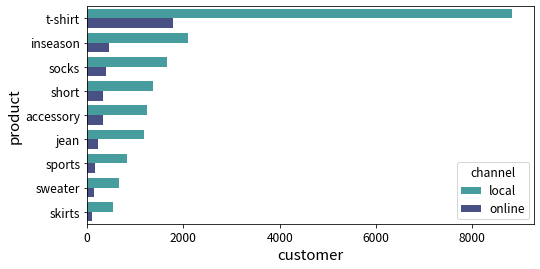

In [112]:
#5.總體的顧客樣貌是什麼?  
plt.figure(figsize=(8,4))
ax = sns.countplot(y='product',hue='channel',data=data,order=data['product'].value_counts().index,palette="mako_r")
plt.tick_params(labelsize=12)
plt.xlabel('customer',fontsize=15)
plt.ylabel('product',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.show()

In [119]:
gender_count=data['gender_group'].value_counts() 
gender_count

Female    14208
Male       7967
Unkown      118
Name: gender_group, dtype: int64

In [101]:
#簡體中文顯示會有異常，把欄位內的簡體中文替換成英文['当季新品' '运动' 'T恤' '袜子' '短裤' '牛仔裤' '毛衣' '配件' '裙子']

data['product'] = data['product'].replace({'当季新品':'inseason', '运动':'sports', 'T恤':'t-shirt', '袜子':'socks', '短裤':'short', '牛仔裤':'jean', '毛衣':'sweater', '配件':'accessory', '裙子':'skirts'})
data['channel'] = data['channel'].replace({'线下':'local','线上':'online'})
data

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,revenue_per_day,gross earnings,gross_earnings,gross_margin
0,658,深圳,local,Female,25-29,Weekday,inseason,4,796.0,4,4,59,159.2,560.0,560.0,70.35
1,146,杭州,local,Female,25-29,Weekday,sports,1,149.0,1,1,49,29.8,100.0,100.0,67.11
2,70,深圳,local,Male,>=60,Weekday,t-shirt,2,178.0,2,2,49,35.6,80.0,80.0,44.94
3,658,深圳,local,Female,25-29,Weekday,t-shirt,1,59.0,1,1,49,11.8,10.0,10.0,16.95
4,229,深圳,local,Male,20-24,Weekend,socks,2,65.0,2,3,9,32.5,38.0,38.0,58.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22288,146,杭州,local,Female,30-34,Weekday,short,1,80.0,1,2,19,16.0,42.0,42.0,52.50
22289,430,成都,local,Female,25-29,Weekend,t-shirt,1,79.0,1,1,49,39.5,30.0,30.0,37.97
22290,449,武汉,local,Female,35-39,Weekday,t-shirt,1,158.0,1,2,49,31.6,60.0,60.0,37.97
22291,758,杭州,local,Female,20-24,Weekday,socks,1,26.0,1,1,9,5.2,17.0,17.0,65.38


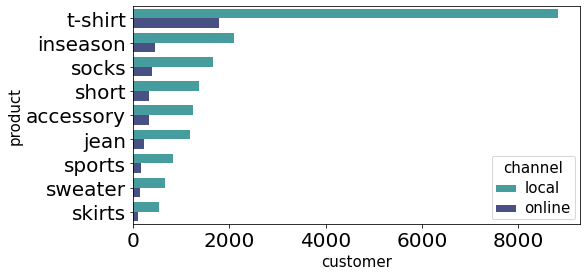

In [102]:
plt.figure(figsize=(8,4))
ax = sns.countplot(y='product',hue='channel',data=data,order=data['product'].value_counts().index,palette="mako_r")
plt.tick_params(labelsize=20)
plt.xlabel('customer',fontsize=15)
plt.ylabel('product',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.show()

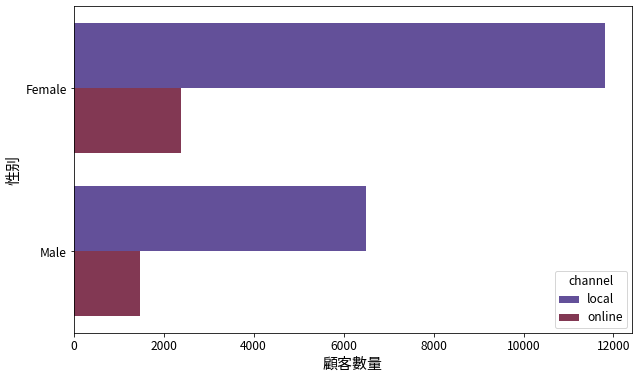

In [122]:
data_q5 = data[data['gender_group'].isin(['Female','Male'])]
plt.figure(figsize=(10,6))
ax = sns.countplot(y='gender_group',hue='channel',data=data_q5,palette="twilight")
plt.tick_params(labelsize=12)
plt.xlabel('顧客數量',fontsize=15)
plt.ylabel('性别',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.show()


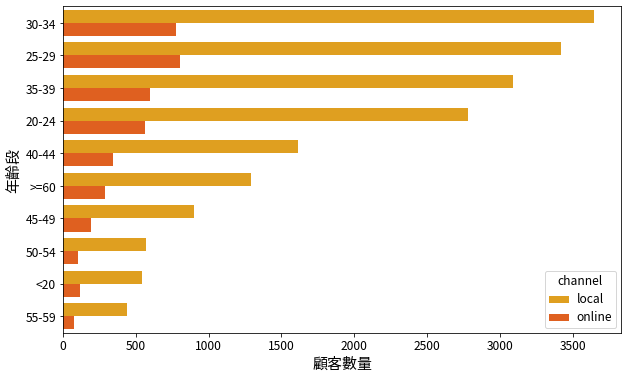

In [121]:
data_q5_2 = data[~data['age_group'].isin(['Unkown'])] #不包含Unkown
plt.figure(figsize=(10,6))
ax = sns.countplot(y='age_group',hue='channel',data=data_q5_2,order=data_q5_2.age_group.value_counts().index,palette='autumn_r')
plt.tick_params(labelsize=12)
plt.xlabel('顧客數量',fontsize=15)
plt.ylabel('年齡段',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.show()

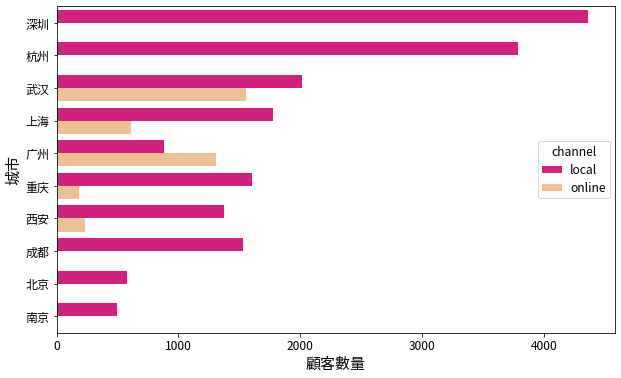

In [123]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y='city',hue='channel',data=data,order=data['city'].value_counts().index,palette='Accent_r')
plt.tick_params(labelsize=12)
plt.xlabel('顧客數量',fontsize=15)
plt.ylabel('城市',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.show()

In [ ]:
#6.銷售額和產品成本之間的關係?   
#每單顧客銷售額為revenue，根據quant可以計算出單件商品的銷售金額，單件商品的成本為unit_cost，可以求出單件利潤margin，可以分析margin如何分布，是否有虧本賣的情況
data['margin'] = data['revenue']/data['quant'] - data['unit_cost']
plt.figure(figsize=(9,5))
sns.boxplot(x='margin',y='product',data=data,palette='cool')
plt.tick_params(labelsize=12)
plt.xlabel('利潤',fontsize=15)
plt.ylabel('產品',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.show()

In [117]:
q1 = ['margin','unit_cost']
data[q1].corr()

,margin,unit_cost
margin,1.00000,0.10275
unit_cost,0.10275,1.00000


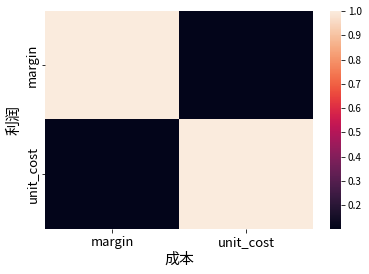

In [118]:
sns.heatmap(data[q1].corr())
plt.tick_params(labelsize=13)
plt.xlabel('成本',fontsize=15)
plt.ylabel('利润',fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.show()

#Q6.銷售額和產品成本之間的關係? 

成本和銷售額相關係數為0.10275，兩者為低度相關關係  
有虧本銷售的產品：毛衣和裙子 tshirt有少量虧本銷售的情況